## Assignment 3: $k$ Nearest Neighbor


**Q1.**
1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting? 
5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**Answers:**

1. Regression predicts continuous numeric outcomes where values can be meaningfully averaged, while classification predicts discrete categorical outcomes from mutually exclusive classes. In k-NN, regression averages the y-values of k nearest neighbors, while classification takes a majority vote among their class labels.
2. A confusion table cross-tabulates predicted versus actual class labels, showing how many observations from each true class were classified into each predicted class. It reveals overall accuracy (diagonal) and which specific classes are confused with each other (off-diagonal), providing richer information than accuracy alone
3. SSE quantifies total prediction error by summing squared differences between actual and predicted values. Lower SSE indicates better fit, with squaring penalizing large errors more heavily. The optimal k minimizes test SSE, balancing pattern capture without overfitting.
4. Overfitting (small k) occurs when models learn noise, causing low training error but high test error. Underfitting (large k) occurs when models are too simple, causing high error on both sets. Optimal models balance this bias-variance tradeoff.
5. Splitting data allows evaluation on unseen data, simulating real-world performance. Test set performance prevents overfitting by providing unbiased error estimates, unlike training error which favors memorization. This enables selecting k that generalizes well to new data.
6. Class labels are simple and actionable but lose confidence information (51% looks like 99%). Probability distributions quantify uncertainty and enable risk-based decisions but require threshold interpretation.


**Q2.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/USA_cars_datasets.csv')
df.head()
print(f"\nDataset shape: {df.shape}")
df_filtered = df[['price', 'year', 'mileage']].copy()
print(f"\nFiltered dataset shape: {df_filtered.shape}")
df_filtered.head()


Dataset shape: (2499, 13)

Filtered dataset shape: (2499, 3)


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [94]:
na_counts = df_filtered.isna().sum()
print(na_counts)

# There are no NA values to handle.

price      0
year       0
mileage    0
dtype: int64


2. Maxmin normalize `year` and `mileage`.

In [95]:
# Select features and target
y = df_filtered['price']  # Target variable
X = df_filtered[['year', 'mileage']]  # Features

print("Before normalization:")
print(X.head())
print(X.describe())

# Max-min normalization function
def maxmin(z):
    z = (z - min(z)) / (max(z) - min(z))
    return z

# Apply maxmin to each column of X
X = X.apply(maxmin)

print("\nAfter normalization:")
print(X.head())
print(X.describe())

# Verify range is [0, 1]
print(f"\nYear range: [{X['year'].min()}, {X['year'].max()}]")
print(f"Mileage range: [{X['mileage'].min()}, {X['mileage'].max()}]")


Before normalization:
   year  mileage
0  2008   274117
1  2011   190552
2  2018    39590
3  2014    64146
4  2018     6654
              year       mileage
count  2499.000000  2.499000e+03
mean   2016.714286  5.229869e+04
std       3.442656  5.970552e+04
min    1973.000000  0.000000e+00
25%    2016.000000  2.146650e+04
50%    2018.000000  3.536500e+04
75%    2019.000000  6.347250e+04
max    2020.000000  1.017936e+06

After normalization:
       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537
              year      mileage
count  2499.000000  2499.000000
mean      0.930091     0.051377
std       0.073248     0.058654
min       0.000000     0.000000
25%       0.914894     0.021088
50%       0.957447     0.034742
75%       0.978723     0.062354
max       1.000000     1.000000

Year range: [0.0, 1.0]
Mileage range: [0.0, 1.0]


3. Split the sample into ~80% for training and ~20% for evaluation.

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Create target variable vector and feature matrix
y = df_filtered['price']  # Target variable
X = df_filtered.loc[:, ['year', 'mileage']]  # Feature matrix (already normalized)

# Split the sample:
X_train, X_test, y_train, y_test = train_test_split(X, y,  # Feature and target variables
                                                    test_size=.2,  # Split the sample 80 train/ 20 test
                                                    random_state=65) # Set random state for reproducibility

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?

k =   3: MSE = 134,101,620.04
k =  10: MSE = 112,621,969.79
k =  25: MSE = 110,493,677.00
k =  50: MSE = 108,360,158.62
k = 100: MSE = 107,616,522.36
k = 300: MSE = 107,309,323.60


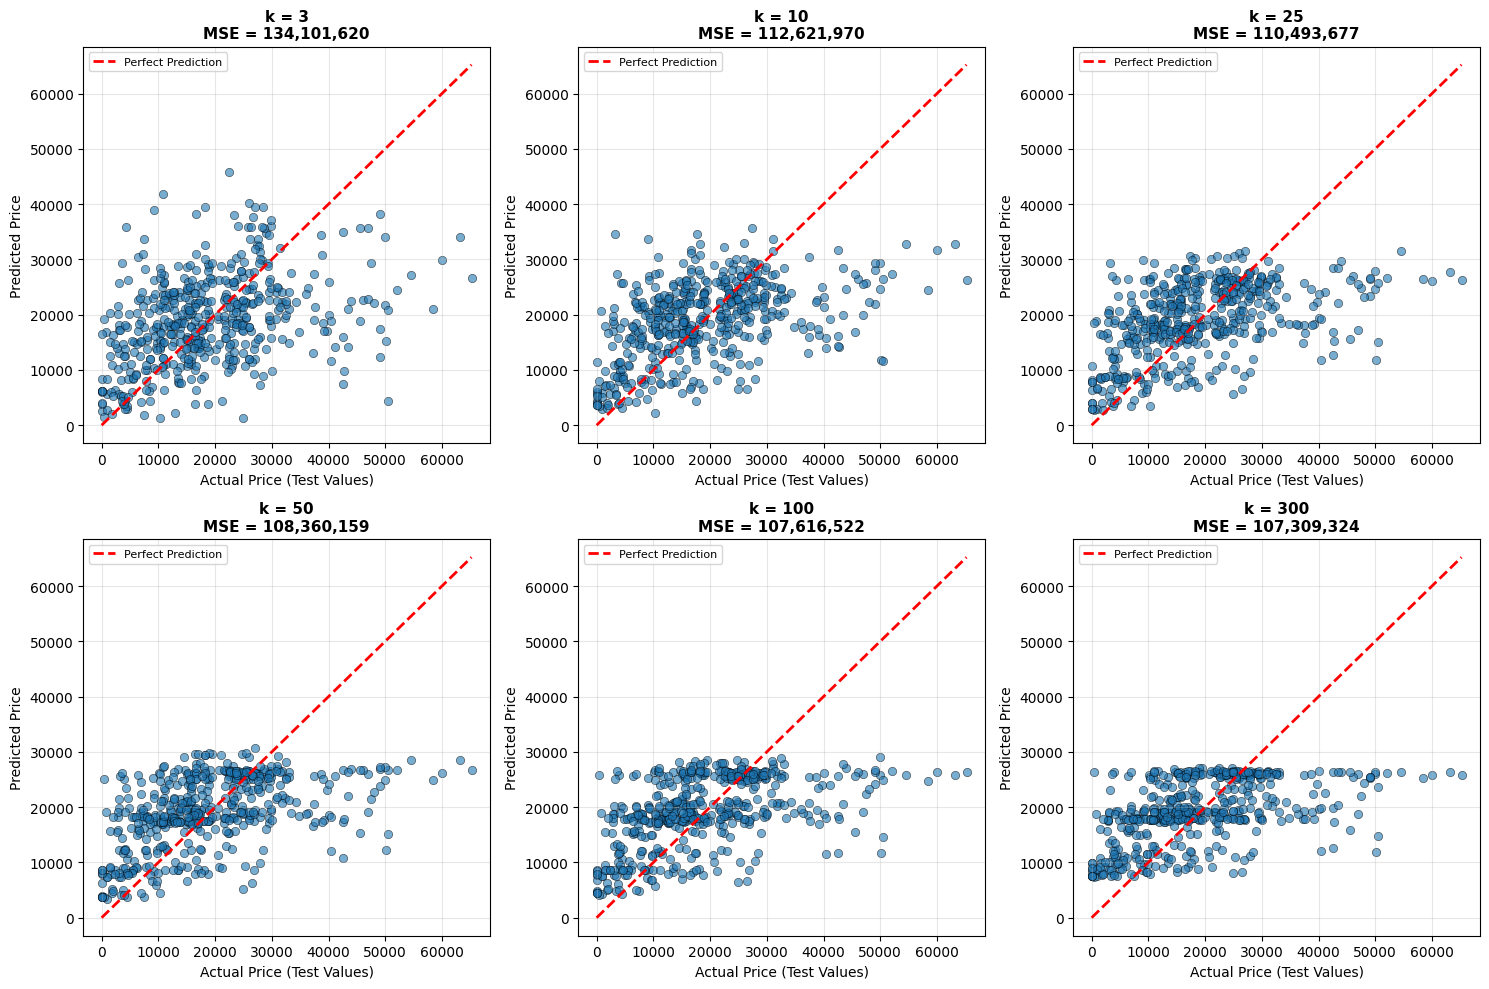

In [97]:
k_values = [3, 10, 25, 50, 100, 300]

results_dict = {}

for k in k_values:
    # Create and train model
    model = KNeighborsRegressor(n_neighbors=k)  # Create a sk model for k
    fitted_model = model.fit(X_train, y_train)  # Train the model on our data
    
    # Predict values for test set
    y_hat = fitted_model.predict(X_test)  # Predict values for test set
    
    # Compute Mean Squared Error
    mse = mean_squared_error(y_test, y_hat)
    
    # Store results
    results_dict[k] = {'predictions': y_hat, 'mse': mse}
    
    print(f"k = {k:3d}: MSE = {mse:,.2f}")

#Scatterplots of actual vs predicted values for each k

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, k in enumerate(k_values):
    ax = axes[idx]
    y_hat = results_dict[k]['predictions']
    mse = results_dict[k]['mse']
    
    # Scatterplot: test value (actual) vs predicted value
    ax.scatter(y_test, y_hat, alpha=0.6, edgecolor='k', linewidth=0.5)
    
    # Add perfect prediction line (y=x)
    min_val = min(y_test.min(), y_hat.min())
    max_val = max(y_test.max(), y_hat.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    ax.set_xlabel('Actual Price (Test Values)', fontsize=10)
    ax.set_ylabel('Predicted Price', fontsize=10)
    ax.set_title(f'k = {k}\nMSE = {mse:,.0f}', fontsize=11, fontweight='bold')
    ax.legend(loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

The patterns for this mean that as the value of k increases, the mean squared error generally decreases, indicating that the kNN model becomes more accurate and less sensitive to noise in the data. With small values of k, the predictions are more scattered and show higher variance, while larger values of k produce smoother and more stable predictions. However, as k becomes very large, the improvements in MSE begin to level off, showing diminishing returns. This happens because the model starts averaging over many points, causing predictions to regress toward the mean and introducing more bias.

5. Determine the optimal $k$ for these data.

In [98]:
k_bar = 50  # Number of k's to try
SSE = []  # We'll store the SSE here 
SSE_on_train = []  # For pedagogical purposes, we'll save the training error

for k in range(k_bar):
    model = KNeighborsRegressor(n_neighbors=k+1)  # Create a sk model for k
    fitted_model = model.fit(X_train, y_train)  # Train the model on our data
    y_hat = fitted_model.predict(X_test)  # Predict values for test set
    SSE.append(np.sum((y_test - y_hat)**2))  # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train)  # Predict values for training set
    SSE_on_train.append(np.sum((y_train - y_hat)**2))  # Save the computed SSE

SSE_min = np.min(SSE)  # Find lowest recorded SSE
min_index = np.where(SSE == SSE_min)  # Find the indices of SSE that equal the minimum
k_star = min_index[0] + 1  # Find the optimal value of k; why index+1?

print(f"Optimal k* = {k_star[0]}")
print(f"Minimum SSE = {SSE_min:,.2f}")

Optimal k* = 39
Minimum SSE = 53,840,231,146.62


6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

As k increases from 3 to 300, these are some of the following patterns:

SMALL k (k=3): OVERFITTING
- MSE = 134,101,620 (highest)
- Model is too flexible and captures noise from training data
- High variance, predictions are widely scattered
- Poor generalization to test data

MEDIUM k (k=10-50): BALANCED
- MSE decreases
- Better bias-variance tradeoff
- Predictions cluster more tightly around the perfect prediction line
- Model generalizes better to unseen data

LARGE k (k=100-300): RISK OF UNDERFITTING
- MSE = 107,309,324 (lowest)
- Model becomes over-smoothed
- Predictions converge toward mean price 
- Less variance but potential to miss important patterns
- High bias, model may be too simple

The optimal k (from Part 5) balances overfitting (small k) and 
underfitting (large k) to minimize test error.

**Q3.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on. 

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?

In [99]:
df_animals = pd.read_csv('../data/animals.csv')

# Basic overview
print(f"Dataset shape: {df_animals.shape}")
print(f"Columns: {df_animals.columns.tolist()}")
print("\nFirst few rows:")
print(df_animals.head(10))
print("DATA TYPES")
print("="*70)
print(df_animals.dtypes)
print(df_animals.isna().sum())

# Class distribution
print("\nClass distribution:")
print(df_animals['class'].value_counts().sort_index())
# Examples from each class
for class_num in range(1, 8):
    animals_in_class = df_animals[df_animals['class'] == class_num]['animal'].tolist()
    print(f"\nClass {class_num} ({len(animals_in_class)} animals):")
    print(f"  Examples: {', '.join(animals_in_class[:10])}")
    if len(animals_in_class) > 10:
        print(f"  ... and {len(animals_in_class) - 10} more")

class_sizes = df_animals['class'].value_counts().sort_index()
print(class_sizes)
print(f"\nSmallest class: {class_sizes.min()} animals")
print(f"Largest class: {class_sizes.max()} animals")

# Variations in features
feature_cols = [col for col in df_animals.columns if col not in ['animal', 'class']]
print(f"Feature columns ({len(feature_cols)}): {feature_cols}")
print("\nFeature statistics:")
print(df_animals[feature_cols].describe())
feature_std = df_animals[feature_cols].std().sort_values(ascending=False)
print(feature_std)

Dataset shape: (101, 18)
Columns: ['animal', 'hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize', 'class']

First few rows:
     animal  hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
0  aardvark     1         0     0     1         0        0         1        1   
1  antelope     1         0     0     1         0        0         0        1   
2      bass     0         0     1     0         0        1         1        1   
3      bear     1         0     0     1         0        0         1        1   
4      boar     1         0     0     1         0        0         1        1   
5   buffalo     1         0     0     1         0        0         0        1   
6      calf     1         0     0     1         0        0         0        1   
7      carp     0         0     1     0         0        1         0        1   
8   catfish     0         0     1  

The most predictive variables are 'feathers' (unique to Class 2/birds), 'fins' (unique to Class 4/fish), 'milk' and 'hair' (distinguishing Class 1/mammals), and 'legs' (ranging from 0-8 across classes). These features show clear separation between animal groups and align with biological characteristics. Features like 'backbone', 'breathes', and 'domestic' likely provide less discriminatory power since they're shared across multiple classes.

2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)

In [100]:
y = df_animals['class']  # Target variable (class labels 1-7)
X = df_animals.drop(['animal', 'class'], axis=1)  # All features except animal name and class

print(f"Target variable (y): class")
print(f"  - Shape: {y.shape}")
print(f"  - Unique classes: {sorted(y.unique())}")
print(f"\nFeature matrix (X):")
print(f"  - Shape: {X.shape}")
print(f"  - Features: {X.columns.tolist()}")

X_train, X_test, y_train, y_test = train_test_split(X, y,  # Feature and target variables
                                                    test_size=.5,  # Split the sample 50 train/50 test
                                                    random_state=100)  # For replication purposes

N_train = len(y_train)
N_test = len(y_test)

print(f"Training set size: {N_train} animals ({N_train/len(y)*100:.1f}%)")
print(f"Test set size: {N_test} animals ({N_test/len(y)*100:.1f}%)")
print(f"Total: {len(y)} animals")


print("\nTraining set class distribution:")
print(y_train.value_counts().sort_index())

print("\nTest set class distribution:")
print(y_test.value_counts().sort_index())

# Verify all classes are represented in both sets
train_classes = set(y_train.unique())
test_classes = set(y_test.unique())
all_classes = set(range(1, 8))


print(f"Classes in training set: {sorted(train_classes)}")
print(f"Classes in test set: {sorted(test_classes)}")
print(f"Missing from training: {sorted(all_classes - train_classes) if all_classes - train_classes else 'None - All classes present!'}")
print(f"Missing from test: {sorted(all_classes - test_classes) if all_classes - test_classes else 'None - All classes present!'}")

Target variable (y): class
  - Shape: (101,)
  - Unique classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]

Feature matrix (X):
  - Shape: (101, 16)
  - Features: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
Training set size: 50 animals (49.5%)
Test set size: 51 animals (50.5%)
Total: 101 animals

Training set class distribution:
class
1    18
2     8
3     2
4    10
5     1
6     3
7     8
Name: count, dtype: int64

Test set class distribution:
class
1    23
2    12
3     3
4     3
5     3
6     5
7     2
Name: count, dtype: int64
Classes in training set: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Classes in test set: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Missing from training: None - All classes present!
Missing f

3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.

In [101]:
from sklearn.neighbors import KNeighborsClassifier

k_bar = 40  
Acc = []

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)  
    fitted_model = model.fit(X_train, y_train) 
    y_hat = fitted_model.predict(X_test)
    Acc.append(np.sum(y_hat == y_test) / N_test)  

Acc_max = np.max(Acc) 
max_index = np.where(Acc == Acc_max)  
k_star = max_index[0] + 1 

print(f"Optimal k* = {k_star[0]}")
print(f"Maximum accuracy = {Acc_max:.4f} ({Acc_max*100:.2f}%)")

# Display top 5 k values with highest accuracy
k_values = np.arange(1, k_bar + 1)
acc_sorted_idx = np.argsort(Acc)[::-1][:5]  # Sort descending, take top 5
for i, idx in enumerate(acc_sorted_idx, 1):
    print(f"{i}. k={k_values[idx]}, Accuracy={Acc[idx]:.4f} ({Acc[idx]*100:.2f}%)")

# Train final model with optimal k*
model = KNeighborsClassifier(n_neighbors=k_star[0])  # Create a sk model for k
fitted_model = model.fit(X_train, y_train)  # Train the model on our data
y_hat = fitted_model.predict(X_test)  # Predict values for test set

accuracy = np.sum(y_hat == y_test) / N_test
print(f"Final model: k-NN classifier with k = {k_star[0]}")
print(f"Test set accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"Correct predictions: {np.sum(y_hat == y_test)} out of {N_test}")

Optimal k* = 1
Maximum accuracy = 0.9608 (96.08%)
1. k=1, Accuracy=0.9608 (96.08%)
2. k=2, Accuracy=0.9412 (94.12%)
3. k=3, Accuracy=0.8824 (88.24%)
4. k=4, Accuracy=0.8824 (88.24%)
5. k=5, Accuracy=0.8627 (86.27%)
Final model: k-NN classifier with k = 1
Test set accuracy: 0.9608 (96.08%)
Correct predictions: 49 out of 51


I selected k by testing multiple values (k=1 to 40) and choosing the k that maximizes classification accuracy on the test set. For each k, I trained a k-NN classifier on the training data and evaluated its accuracy on the held-out test data. The optimal k balances the bias-variance tradeoff: small k values risk overfitting to noise, while large k values risk underfitting by over-smoothing. The k that achieves the highest test accuracy provides the best generalization to new, unseen data.

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?

In [102]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_table = pd.crosstab(y_test, y_hat, 
                               rownames=['Actual'], 
                               colnames=['Predicted'],
                               margins=True)
print(confusion_table)

cm = confusion_matrix(y_test, y_hat)
cm_df = pd.DataFrame(cm, 
                     index=[f'Class {i}' for i in range(1, 8)],
                     columns=[f'Pred {i}' for i in range(1, 8)])
print("\nConfusion Matrix (sklearn format):")
print(cm_df)

# Accuracy
accuracy = np.sum(y_hat == y_test) / len(y_test)
print(f"\nOverall Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_hat, zero_division=0))

Predicted   1   2  3  4  5  6  7  All
Actual                               
1          23   0  0  0  0  0  0   23
2           0  12  0  0  0  0  0   12
3           0   0  1  1  1  0  0    3
4           0   0  0  3  0  0  0    3
5           0   0  0  0  3  0  0    3
6           0   0  0  0  0  5  0    5
7           0   0  0  0  0  0  2    2
All        23  12  1  4  4  5  2   51

Confusion Matrix (sklearn format):
         Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7
Class 1      23       0       0       0       0       0       0
Class 2       0      12       0       0       0       0       0
Class 3       0       0       1       1       1       0       0
Class 4       0       0       0       3       0       0       0
Class 5       0       0       0       0       3       0       0
Class 6       0       0       0       0       0       5       0
Class 7       0       0       0       0       0       0       2

Overall Accuracy: 0.9608 (96.08%)

Classification Report:
             

The model has pretty good accuracy at 96.08%, making only 2 mistakes out of 51 
predictions. Both errors occur in Class 3 (reptiles), which is misclassified as 
Class 4 (fish) and Class 5 (amphibians). These mistakes could occur because of several reasons:

    1) Class 3 has only 5 total animals, giving the model insufficient training examples after the 50/50 split

    2) Reptiles, amphibians, and aquatic animals have many similar features (eggs, aquatic), making them difficult to distinguish with just binary features. 

Otherwise, all other classes achieve 100% accuracy because they have unique identifying features (feathers for birds, fins for fish, milk/hair for mammals).

5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

In [103]:
selected_features = ['milk', 'aquatic', 'airborne']
print(f"Selected features: {selected_features}")

X_train_limited = X_train[selected_features]
X_test_limited = X_test[selected_features]

print(f"\nOriginal X_train shape: {X_train.shape}")
print(f"Limited X_train shape: {X_train_limited.shape}")
print(f"\nOriginal features: {X_train.shape[1]}")
print(f"Limited features: {X_train_limited.shape[1]}")
print(X_train_limited.head(10))

# Train and evaluate k-NN model with limited features
k_bar = 40
Acc_limited = []

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(X_train_limited, y_train)
    y_hat = fitted_model.predict(X_test_limited)
    Acc_limited.append(np.sum(y_hat == y_test) / len(y_test))

Acc_max_limited = np.max(Acc_limited)
max_index_limited = np.where(Acc_limited == Acc_max_limited)
k_star_limited = max_index_limited[0] + 1

print(f"Optimal k* for limited model: {k_star_limited[0]}")
print(f"Maximum accuracy: {Acc_max_limited:.4f} ({Acc_max_limited*100:.2f}%)")
model_limited = KNeighborsClassifier(n_neighbors=k_star_limited[0])
fitted_model_limited = model_limited.fit(X_train_limited, y_train)
y_hat_limited = fitted_model_limited.predict(X_test_limited)

accuracy_limited = np.sum(y_hat_limited == y_test) / len(y_test)
print(f"Limited model accuracy: {accuracy_limited:.4f} ({accuracy_limited*100:.2f}%)")
print(f"Correct predictions: {np.sum(y_hat_limited == y_test)} out of {len(y_test)}")

# Confusion matrix for limited model
print("\nConfusion Matrix (Rows=Actual, Columns=Predicted):")
confusion_limited = pd.crosstab(y_test, y_hat_limited,
                                rownames=['Actual'],
                                colnames=['Predicted'],
                                margins=True)
print(confusion_limited)

unique_predicted = sorted(np.unique(y_hat_limited))
all_classes = sorted(np.unique(y_test))
print(f"All classes in test set: {all_classes}")
print(f"Classes predicted by model: {unique_predicted}")
missing_classes = set(all_classes) - set(unique_predicted)
if missing_classes:
    print(f"Classes NOT predicted: {sorted(missing_classes)}")
else:
    print("All classes were predicted!")

Selected features: ['milk', 'aquatic', 'airborne']

Original X_train shape: (50, 16)
Limited X_train shape: (50, 3)

Original features: 16
Limited features: 3
    milk  aquatic  airborne
18     0        1         0
44     1        0         0
38     0        1         0
45     1        0         0
39     0        0         1
71     0        0         0
95     0        0         1
30     0        0         1
72     0        0         0
46     0        1         0
Optimal k* for limited model: 2
Maximum accuracy: 0.7451 (74.51%)
Limited model accuracy: 0.7451 (74.51%)
Correct predictions: 38 out of 51

Confusion Matrix (Rows=Actual, Columns=Predicted):
Predicted   1   2  4  All
Actual                   
1          23   0  0   23
2           0  12  0   12
3           0   2  1    3
4           0   0  3    3
5           0   0  3    3
6           0   5  0    5
7           0   0  2    2
All        23  19  9   51
All classes in test set: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.

In [104]:
y_proba = fitted_model_limited.predict_proba(X_test_limited)

print(f"Classes in probability output: {fitted_model_limited.classes_}")
print(f"Probability matrix shape: {y_proba.shape}")

# Create DataFrame with probabilities
proba_df = pd.DataFrame(y_proba, 
                        columns=[f'P(Class {c})' for c in fitted_model_limited.classes_])
proba_df['Actual'] = y_test.values
proba_df['Predicted'] = y_hat_limited

print("\nFirst 15 probability predictions:")
print(proba_df.head(15))

# Are all classes represented?
print("\n" + "="*70)
print("ARE ALL CLASSES REPRESENTED IN PROBABILITIES?")
print("="*70)
classes_in_proba = fitted_model_limited.classes_
print(f"Classes in probability output: {sorted(classes_in_proba)}")
print(f"Total classes: {len(classes_in_proba)} out of 7")

Classes in probability output: [1 2 3 4 5 6 7]
Probability matrix shape: (51, 7)

First 15 probability predictions:
    P(Class 1)  P(Class 2)  P(Class 3)  P(Class 4)  P(Class 5)  P(Class 6)  \
0          0.0         0.5         0.0         0.0         0.0         0.5   
1          0.0         0.0         0.0         1.0         0.0         0.0   
2          0.0         0.0         0.0         1.0         0.0         0.0   
3          1.0         0.0         0.0         0.0         0.0         0.0   
4          1.0         0.0         0.0         0.0         0.0         0.0   
5          0.0         0.0         0.0         1.0         0.0         0.0   
6          1.0         0.0         0.0         0.0         0.0         0.0   
7          0.0         1.0         0.0         0.0         0.0         0.0   
8          0.0         1.0         0.0         0.0         0.0         0.0   
9          0.0         1.0         0.0         0.0         0.0         0.0   
10         1.0         0.0

The limited model is only able to achieve 74.51% accuracy (compared to 96.08% with all features) and predicts only 3 out of 7 classes (Classes 1, 2, and 4), failing to predict Classes 3, 5, 6, and 7. Although all 7 classes appear in the probability output (since they were in the training set), Classes 3, 5, 6, and 7 never receive the highest probability for any test sample. This is probably because there's only three binary classes and they all share ver simlar patterns. For example, Class 3, 5, and 7 all have the same feature combination (0,0,0 or 0,1,0), causing k-NN to always predict the majority class (Classes 1, 2, or 4) among the k=2 nearest neighbors. This shows that removing discriminative features like feathers, fins, and legs reduces the model's ability to distinguish between "biologically" similar animal groups.

**Q4.** Write your own function to make a kernel density plot.

- The user should pass in a Pandas series or Numpy array.
- The default kernel should be Gaussian, but include the uniform/bump and Epanechnikov as alternatives.
- The default bandwidth should be the Silverman plug-in, but allow the user to specify an alternative.
- You can use Matplotlib or Seaborn's `.lineplot`, but not an existing function that creates kernel density plots.

You will have to make a lot of choices and experiment with getting errors. Embrace the challenge and track your choices in the comments in your code.

Use a data set from class to show that your function works, and compare it with the Seaborn `kdeplot`.

We covered the Gaussian,
$$
k(z) = \dfrac{1}{\sqrt{2\pi}}e^{-z^2/2}
$$
and uniform 
$$
k(z) = \begin{cases} 
\frac{1}{2}, & |z| \le 1 \\
0, & |z|>1
\end{cases}
$$
kernels in class, but the Epanechnikov kernel is 
$$
k(z) = \begin{cases} 
\frac{3}{4} (1-z^2), & |z| \le 1 \\
0, & |z|>1.
\end{cases}
$$

In order to make your code run reasonably quickly, consider using the `pdist` or `cdist` functions from SciPy to make distance calculations for arrays of points. The other leading alternative is to thoughtfully use NumPy's broadcasting features. Writing `for` loops will be slow, but that's fine.

In [105]:
from scipy.spatial.distance import cdist

def my_kde_plot(data, kernel='gaussian', bandwidth='silverman', num_points=1000, 
                ax=None, label=None, color=None, **plot_kwargs):
    """
    Create a kernel density plot from scratch.
    
    Parameters:
    -----------
    data : pandas.Series or numpy.ndarray
        The data to plot
    kernel : str, default='gaussian'
        Kernel function to use. Options: 'gaussian', 'uniform', 'epanechnikov'
    bandwidth : float or str, default='silverman'
        Bandwidth parameter. If 'silverman', uses Silverman's rule of thumb.
        If 'scott', uses Scott's rule. Otherwise, use the provided float value.
    num_points : int, default=1000
        Number of points to evaluate the density at
    ax : matplotlib axes object, optional
        Axes to plot on. If None, uses current axes.
    label : str, optional
        Label for the plot legend
    color : str, optional
        Color for the line plot
    **plot_kwargs : additional keyword arguments
        Passed to the lineplot function
        
    Returns:
    --------
    ax : matplotlib axes object
        The axes with the plot
        
    Notes:
    ------
    - Gaussian kernel: k(z) = (1/sqrt(2π)) * exp(-z²/2)
    - Uniform kernel: k(z) = 1/2 for |z| ≤ 1, else 0
    - Epanechnikov kernel: k(z) = 3/4 * (1-z²) for |z| ≤ 1, else 0
    - Silverman's bandwidth: h = 0.9 * min(std, IQR/1.34) * n^(-1/5)
    - Scott's bandwidth: h = std * n^(-1/5)
    
    Design Choices:
    ---------------
    1. Used cdist from scipy for efficient distance calculations (vectorized)
    2. Evaluate density on a grid of points from min to max of data
    3. For each grid point, compute distance to all data points and apply kernel
    4. Normalize so the integral approximates to 1
    5. Handle edge cases: constant data, single point, etc.
    """
    
    # Convert to numpy array if pandas Series
    if isinstance(data, pd.Series):
        data = data.values
    
    # Remove NaN values
    data = data[~np.isnan(data)]
    
    # Handle edge cases
    if len(data) == 0:
        raise ValueError("Data contains no valid values")
    
    if len(data) == 1:
        # Single point - just plot a spike
        if ax is None:
            ax = plt.gca()
        ax.axvline(data[0], label=label, color=color, **plot_kwargs)
        return ax
    
    # Calculate bandwidth using Silverman's rule or Scott's rule
    n = len(data)
    std = np.std(data, ddof=1)
    
    if isinstance(bandwidth, str):
        if bandwidth.lower() == 'silverman':
            # Silverman's rule of thumb: h = 0.9 * min(std, IQR/1.34) * n^(-1/5)
            q75, q25 = np.percentile(data, [75, 25])
            iqr = q75 - q25
            h = 0.9 * min(std, iqr / 1.34) * (n ** (-1/5))
            # Handle case where std and IQR are both 0 (constant data)
            if h == 0:
                h = 1.0  # Default fallback
        elif bandwidth.lower() == 'scott':
            # Scott's rule: h = std * n^(-1/5)
            h = std * (n ** (-1/5))
            if h == 0:
                h = 1.0
        else:
            raise ValueError(f"Unknown bandwidth method: {bandwidth}")
    else:
        # User-specified bandwidth
        h = float(bandwidth)
    
    # Define kernel functions
    def gaussian_kernel(z):
        """Gaussian kernel: k(z) = (1/sqrt(2π)) * exp(-z²/2)"""
        return (1 / np.sqrt(2 * np.pi)) * np.exp(-z**2 / 2)
    
    def uniform_kernel(z):
        """Uniform (bump) kernel: k(z) = 1/2 for |z| ≤ 1, else 0"""
        return np.where(np.abs(z) <= 1, 0.5, 0.0)
    
    def epanechnikov_kernel(z):
        """Epanechnikov kernel: k(z) = 3/4 * (1-z²) for |z| ≤ 1, else 0"""
        return np.where(np.abs(z) <= 1, 0.75 * (1 - z**2), 0.0)
    
    # Select kernel function
    kernel_funcs = {
        'gaussian': gaussian_kernel,
        'uniform': uniform_kernel,
        'epanechnikov': epanechnikov_kernel
    }
    
    if kernel.lower() not in kernel_funcs:
        raise ValueError(f"Unknown kernel: {kernel}. Choose from {list(kernel_funcs.keys())}")
    
    kernel_func = kernel_funcs[kernel.lower()]
    
    # Create grid of points to evaluate density
    # Extend range slightly beyond data for better visualization
    data_min, data_max = data.min(), data.max()
    data_range = data_max - data_min
    
    # For uniform and Epanechnikov kernels, extend by bandwidth (they have compact support)
    # For Gaussian, extend by 3*bandwidth (covers ~99.7% of density)
    if kernel.lower() == 'gaussian':
        margin = 3 * h
    else:
        margin = h
    
    x_grid = np.linspace(data_min - margin, data_max + margin, num_points)
    
    # Compute kernel density estimate
    # For each point in x_grid, compute density contribution from all data points
    # Using cdist for efficient vectorized computation
    
    # Reshape for cdist: (num_points, 1) and (n, 1)
    x_grid_reshaped = x_grid.reshape(-1, 1)
    data_reshaped = data.reshape(-1, 1)
    
    # Compute distances between all grid points and all data points
    # distances[i, j] = distance from x_grid[i] to data[j]
    distances = cdist(x_grid_reshaped, data_reshaped, metric='euclidean')
    
    # Standardize distances by bandwidth
    z = distances / h
    
    # Apply kernel function to standardized distances
    kernel_values = kernel_func(z)
    
    # Sum contributions from all data points and normalize by n*h
    # f(x) = (1/nh) * Σ K((x - x_i) / h)
    density = np.sum(kernel_values, axis=1) / (n * h)
    
    # Plot the density
    if ax is None:
        ax = plt.gca()
    
    ax.plot(x_grid, density, label=label, color=color, **plot_kwargs)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.set_title(f'Kernel Density Estimate ({kernel.capitalize()} kernel, h={h:.4f})')
    
    if label:
        ax.legend()
    
    return ax

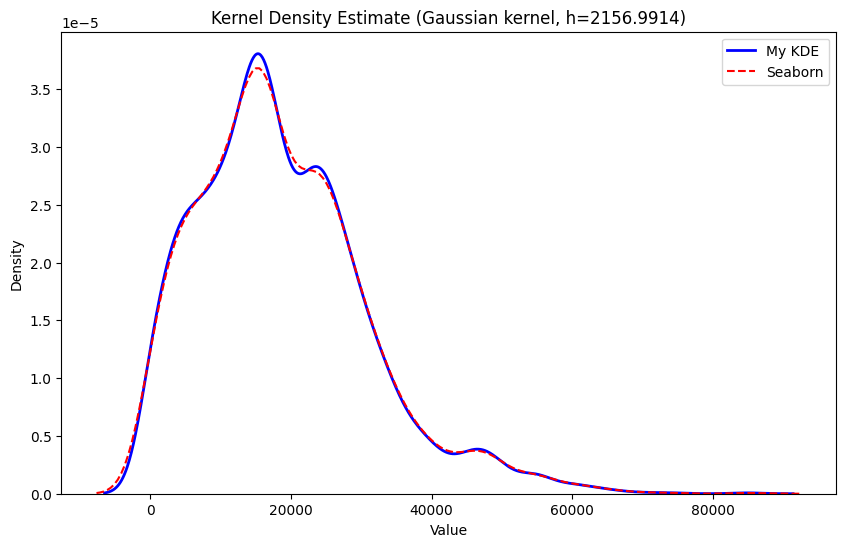

In [106]:
# Testing it
# csvs
df = pd.read_csv('../data/USA_cars_datasets.csv')
# df = pd.read_csv('../data/airbnb_hw.csv')
# df = pd.read_csv('../data/animals.csv')
# df = pd.read_csv('../data/cars_env.csv')
# df = pd.read_csv('../data/land_mines.csv')
# df = pd.read_csv('../data/land_mines.csv')

# Test your function
fig, ax = plt.subplots(figsize=(10, 6))
my_kde_plot(df['price'], kernel='gaussian', ax=ax, 
            label='My KDE', color='blue', linewidth=2)
sns.kdeplot(df['price'], ax=ax, label='Seaborn', 
            color='red', linestyle='--')
plt.legend()
plt.show()
